In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
trade_df

In [ ]:
trade_df['ATR'].plot()


In [78]:
trade_df

,MACD,MACD_Signal,MACD_Hist,RSI,ADX,AROON_Oscillator,WILLR,label
0,0.001221,0.001228,-0.000006,57.977440,17.064693,92.857143,-41.191067,1.0
1,0.000173,0.000217,-0.000044,48.461790,11.488081,78.571429,-69.267139,1.0
2,0.000130,0.000210,-0.000079,45.242132,10.943680,-35.714286,-90.758294,1.0
3,0.000478,0.000489,-0.000011,48.478447,21.981100,42.857143,-83.270677,1.0
4,0.000588,0.000676,-0.000088,49.459657,34.881962,-21.428571,-57.057949,1.0
...,...,...,...,...,...,...,...,...
387,-0.000019,-0.000049,0.000030,58.281142,23.694445,-42.857143,-0.462963,1.0
388,-0.000186,-0.000194,0.000008,51.400959,18.498395,-42.857143,-45.092838,1.0
389,-0.000011,-0.000052,0.000041,54.286361,23.587833,21.428571,-21.558442,1.0
390,0.000480,0.000485,-0.000004,52.656257,29.944442,35.714286,-64.727273,0.0


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer

trade_df = pd.read_csv('/projects/genomic-ml/da2343/ml_project_2/data/EURUSD_H1_2011_2015_TRADES.csv')
trade_df = trade_df[['position', 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI', 'ADX', 'AROON_Oscillator', 'WILLR', 'label']]
# trade_df = trade_df[[ 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI', 'ADX', 'AROON_Oscillator', 'WILLR', 'label']]
# trade_df = trade_df[[ 'RSI', 'label']]

data_dict = {
    'EURUSD_TRADES': (trade_df.iloc[:, :-1].to_numpy(), trade_df.iloc[:, -1] ),
    'EURUSD_TRADES_SS': (StandardScaler().fit_transform(trade_df.iloc[:, :-1].to_numpy()), trade_df.iloc[:, -1] ),
    'EURUSD_TRADES_PT': (PowerTransformer().fit_transform(trade_df.iloc[:, :-1].to_numpy()), trade_df.iloc[:, -1] ),
}

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to c

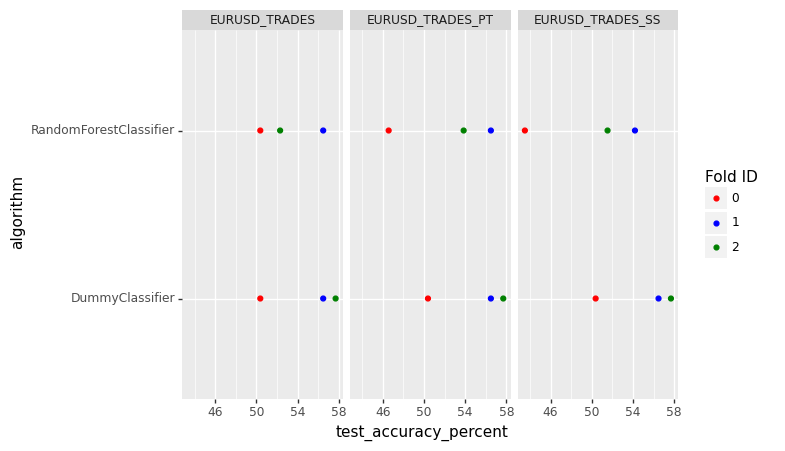

<ggplot: (1413498708493)>

In [10]:
import pandas as pd
import numpy as np
import plotnine as p9
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.pipeline import *

from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.model_selection import *
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib
import plotnine as p9

test_acc_df_list = []


classifier_dict = {
    # "KNeighborsClassifier": KNeighborsClassifier(10),
    # "SVC": SVC(kernel="linear", C=0.025),
    # "SVC": SVC(gamma=2, C=1),
    # "GaussianProcessClassifier": GaussianProcessClassifier(1.0 * RBF(1.0)),
    # "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5),
    # "MLPClassifier": MLPClassifier(alpha=1, max_iter=1_000_000_000_000),
    # "AdaBoostClassifier": AdaBoostClassifier(),
    # "GaussianNB": GaussianNB(),
    # "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RandomForestClassifier": Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', RandomForestClassifier())
]),
    'DummyClassifier': DummyClassifier(strategy="most_frequent"),
    # 'LogisticRegressionCV': LogisticRegressionCV(cv=3, random_state=0, max_iter=1_000_000_000),
    # 'LassoCV': LassoCV(cv=StratifiedKFold(n_splits=3), scoring=accuracy_score, random_state=0, max_iter=1_000_000_000),
    
}

for data_set, (input_mat, output_vec) in data_dict.items():
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    for fold_id, (train_index, test_index) in enumerate(kf.split(input_mat)):
        X_train, X_test = input_mat[train_index], input_mat[test_index]
        y_train, y_test = output_vec[train_index], output_vec[test_index]

        pred_dict = {}
        # iterate over classifiers
        for name, clf in classifier_dict.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            pred_dict[name] = y_pred
        
        for algorithm, y_pred in pred_dict.items():
            test_acc_dict = {
                "test_accuracy_percent": accuracy_score(y_test, y_pred) * 100,
                "data_set": data_set,
                "fold_id": fold_id,
                "algorithm": algorithm
            }
            test_acc_df_list.append(pd.DataFrame(test_acc_dict, index=[0]))
test_acc_df = pd.concat(test_acc_df_list)


test_acc_df = pd.concat(test_acc_df_list)
gg = p9.ggplot() +\
    p9.geom_point(
        p9.aes(
            x="test_accuracy_percent",
            y="algorithm",
            color = "factor(fold_id)",
        ),
        data=test_acc_df) +\
    p9.facet_wrap("data_set") +\
    p9.scale_color_manual(values=["red", "blue", "green", "yellow", "pink"], name= "Fold ID")
gg


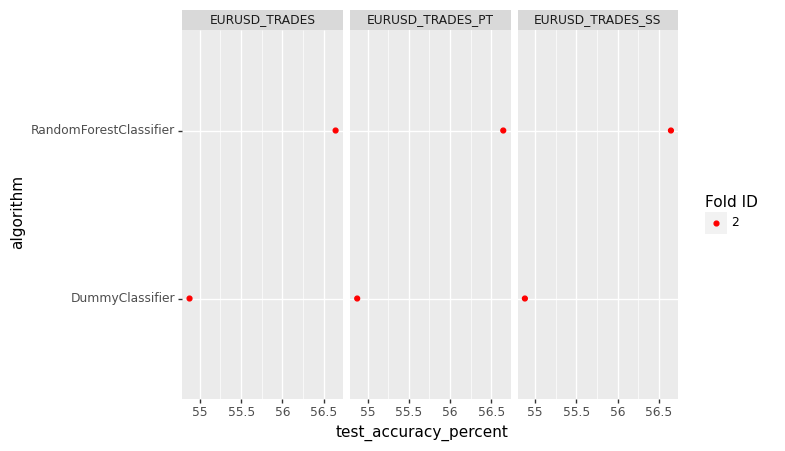

<ggplot: (1413498892668)>

In [7]:
mean_test_acc_df = test_acc_df.groupby(["data_set", "algorithm"]).mean().reset_index()


gg = p9.ggplot() +\
    p9.geom_point(
        p9.aes(
            x="test_accuracy_percent",
            y="algorithm",
            color = "factor(fold_id)",
        ),
        data=mean_test_acc_df) +\
    p9.facet_wrap("data_set") +\
    p9.scale_color_manual(values=["red", "blue", "green"], name= "Fold ID")
gg
